## Appendix - Python Code and Outputs

### Data Preparation

First, we will set up this notebook so that it will display multiple outputs for each cell if needed.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Second, we will import the data.  We will view the first five rows of data and the shape of the dataframe to confirm that the data imported correctly.

In [2]:
import pandas as pd
housing_training_data = pd.read_csv('train.csv')

# show first five rows of the data
housing_training_data.head()
# show number of columns and rows
housing_training_data.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

### Distribution of the Dependent Variable

We can begin examining the distribution of this dataset's dependent variable, sale price, by generating summary statistics for this variable.

In [3]:
housing_training_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can also construct a histogram and a boxplot to visualize the distribution of the sale price variable in this dataframe.

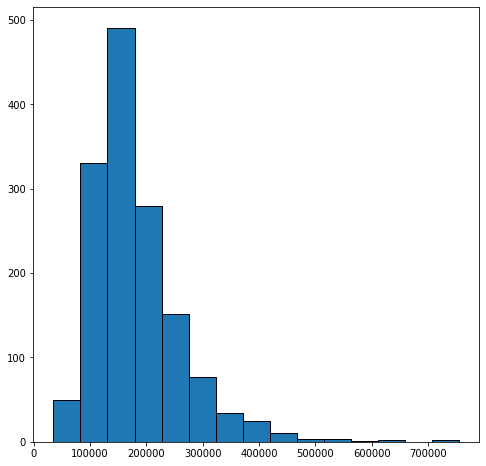

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

histogram = housing_training_data['SalePrice'].hist(edgecolor = 'black', bins = 15, figsize = (8, 8), grid = False)

<AxesSubplot:xlabel='SalePrice'>

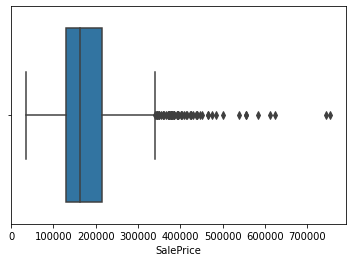

In [5]:
sns.boxplot(x=housing_training_data["SalePrice"])

homeprice kurtosis: 6.509812011089439
log of homeprice kurtosis: 0.8026555069117713
boxcox transform of homeprice kurtosis: 0.870759906431624


array([<AxesSubplot:title={'center':'SalePrice'}>], dtype=object)

array([<AxesSubplot:title={'center':'logSalePrice'}>], dtype=object)

array([<AxesSubplot:title={'center':'boxcoxSalePrice'}>], dtype=object)

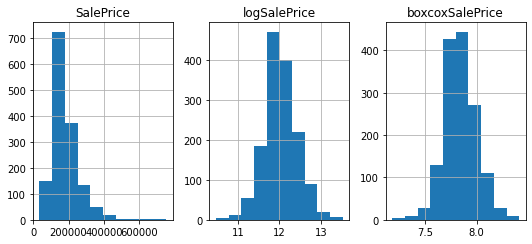

In [6]:
import numpy as np
from scipy import stats
from scipy.stats import norm, kurtosis
df = []
raw_data = housing_training_data['SalePrice']
transform_data = np.log(housing_training_data['SalePrice'])
transform_data2, best_lambda = stats.boxcox(housing_training_data['SalePrice'])


print("homeprice kurtosis:", kurtosis(raw_data))
print("log of homeprice kurtosis:", kurtosis(transform_data))
print("boxcox transform of homeprice kurtosis:", kurtosis(transform_data2))


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

s1 = pd.DataFrame(raw_data)
s2 = pd.DataFrame(np.array(transform_data).tolist(), columns = ['logSalePrice'])
s3 = pd.DataFrame(np.array(transform_data2).tolist(), columns = ['boxcoxSalePrice'])

fig, axes = plt.subplots(1, 3)

s1.hist('SalePrice', ax=axes[0])
s2.hist('logSalePrice', ax=axes[1])
s3.hist('boxcoxSalePrice', ax=axes[2])
plt.show()

## Shapiro Wilk test for normality

In [7]:
print("Shapiro Wilk test for normality: ", stats.shapiro(raw_data))
print("Shapiro Wilk test for normality: ", stats.shapiro(transform_data))
print("Shapiro Wilk test for normality: ", stats.shapiro(transform_data2))

Shapiro Wilk test for normality:  (0.869671642780304, 3.206247534576162e-33)
Shapiro Wilk test for normality:  (0.9912067651748657, 1.1490678986092462e-07)
Shapiro Wilk test for normality:  (0.9915341138839722, 1.906367685933219e-07)


The Shapiro Wilk test for normality (H0: normal, Ha: not-normal) suggests a departure from normality for both the raw and transformed data.

### Investigation of Missing Data and Outliers

We can take a look at the counts of reported values in each column to determine the number of missing values for each variable in the dataframe.

In [8]:
# find null counts, percentage of null values, and column type
null_count = housing_training_data.isnull().sum()
null_percentage = housing_training_data.isnull().sum() * 100 / len(housing_training_data)
column_type = housing_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageType,81,5.547945,object
GarageYrBlt,81,5.547945,float64
GarageFinish,81,5.547945,object
GarageQual,81,5.547945,object


We will deal with columns that contain missing values. For the purpose of this exploratory data analysis, we will use the percentage of nulls missing, the column type, and the other columns present in the data that may provide information that can be used to fill in the missing values.

We will remove columns with over 50% Null values.

In [9]:
# PoolQC, MiscFeature, Alley, Fence all have over 50% of missing values, we will remove those from our dataframe
housing_training_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

# show new shape
housing_training_data.shape

(1460, 77)

We will set Null values in columns that are non-numeric to None.

In [10]:
# select non-numeric columns that contain more than 1 Null value
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond','MasVnrType','Electrical']
# set Nulls in non-numeric columns to 'None'
housing_training_data[columns_None] = housing_training_data[columns_None].fillna('None')

We determine the best way to handle nulls for each numeric column. We replace nulls in Masonry veneer area with 0, nulls in Lot Frontage with the median, and nulls in Year Garage was built with the average between the year the garage was built and year house was built .

In [11]:
# change Null values to 0 for Masonry veneer area
housing_training_data['MasVnrArea'].fillna(0, inplace=True)

# show distribution stats for Lot Frontage
housing_training_data['LotFrontage'].describe()
# fill Nulls for Lot Frontage with median value
housing_training_data['LotFrontage'].fillna(housing_training_data['LotFrontage'].median(), inplace=True)

# average years between garage being built and years built
avg_years = round((housing_training_data['GarageYrBlt'] - housing_training_data['YearBuilt']).mean())
# fill Nulls with avg bet year garage was built and year house was built 
housing_training_data['GarageYrBlt'].fillna(housing_training_data['YearBuilt']+avg_years, inplace=True)

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can see there are no more missing values in our original dataframe.

In [12]:
# check that there are no more missing values in the dataframe
null_count = housing_training_data.isnull().sum()
null_count[null_count != 0]

Series([], dtype: int64)

We can also create boxplots for each of the continuous variables in the dataframe to analyze whether outliers exist for each of those variables.

<AxesSubplot:xlabel='LotFrontage'>

<AxesSubplot:xlabel='LotArea'>

<AxesSubplot:xlabel='OverallQual'>

<AxesSubplot:xlabel='OverallCond'>

<AxesSubplot:xlabel='YearBuilt'>

<AxesSubplot:xlabel='YearRemodAdd'>

<AxesSubplot:xlabel='MasVnrArea'>

<AxesSubplot:xlabel='BsmtFinSF1'>

<AxesSubplot:xlabel='BsmtFinSF2'>

<AxesSubplot:xlabel='BsmtUnfSF'>

<AxesSubplot:xlabel='TotalBsmtSF'>

<AxesSubplot:xlabel='1stFlrSF'>

<AxesSubplot:xlabel='2ndFlrSF'>

<AxesSubplot:xlabel='LowQualFinSF'>

<AxesSubplot:xlabel='GrLivArea'>

<AxesSubplot:xlabel='BsmtFullBath'>

<AxesSubplot:xlabel='BsmtHalfBath'>

<AxesSubplot:xlabel='FullBath'>

<AxesSubplot:xlabel='HalfBath'>

<AxesSubplot:xlabel='BedroomAbvGr'>

<AxesSubplot:xlabel='KitchenAbvGr'>

<AxesSubplot:xlabel='TotRmsAbvGrd'>

<AxesSubplot:xlabel='Fireplaces'>

<AxesSubplot:xlabel='GarageYrBlt'>

<AxesSubplot:xlabel='GarageCars'>

<AxesSubplot:xlabel='GarageArea'>

<AxesSubplot:xlabel='WoodDeckSF'>

<AxesSubplot:xlabel='OpenPorchSF'>

<AxesSubplot:xlabel='EnclosedPorch'>

<AxesSubplot:xlabel='3SsnPorch'>

<AxesSubplot:xlabel='ScreenPorch'>

<AxesSubplot:xlabel='PoolArea'>

<AxesSubplot:xlabel='MiscVal'>

<AxesSubplot:xlabel='SalePrice'>

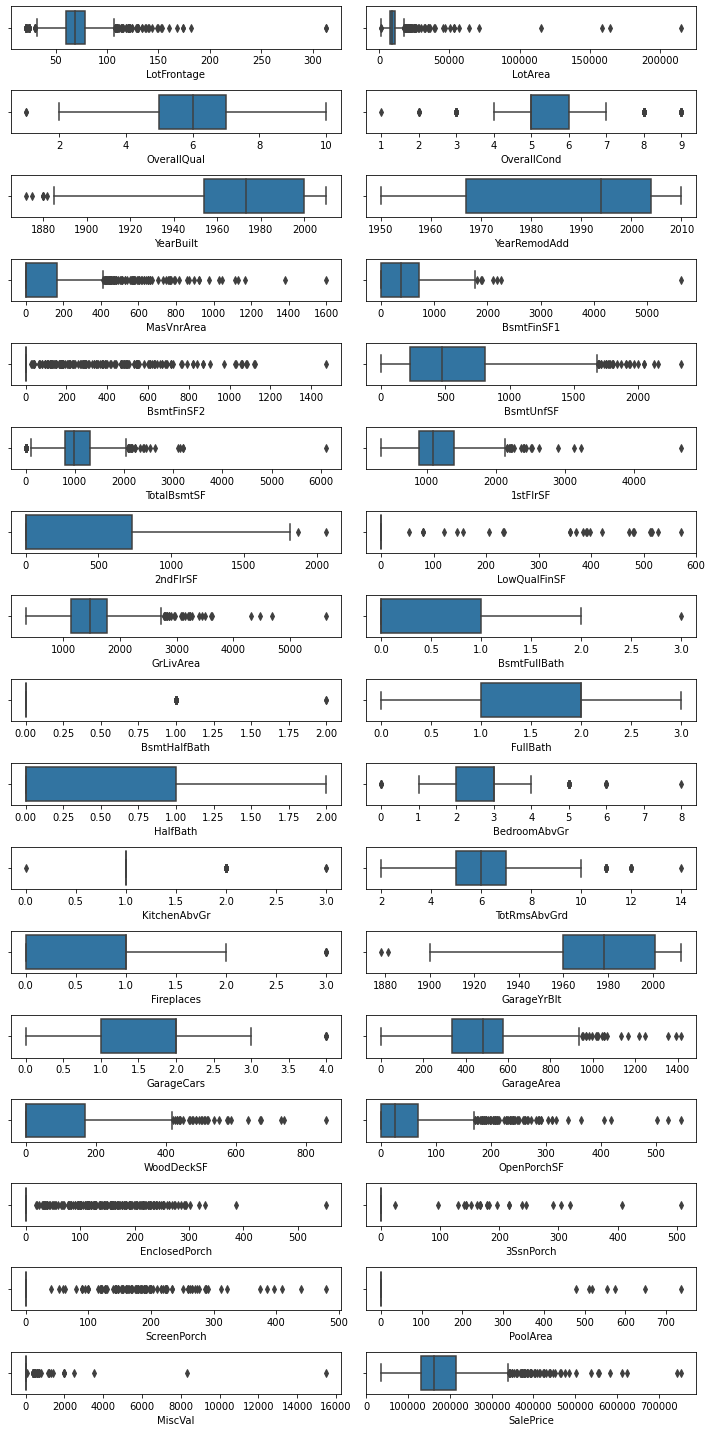

In [13]:
numerical_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

fig, ax = plt.subplots(17, 2, figsize = (10, 20))

for var, subplot in zip(numerical_vars, ax.flatten()):
    sns.boxplot(x=housing_training_data[var], ax = subplot)
    
fig.tight_layout()

### Examination of the Relationship between the Dependent Variable and Potential Predictors

We can use a correlation heatmap to quantify the correlation between the dependent variable, sale price, and the potential continuous predictor variables.

<AxesSubplot:>

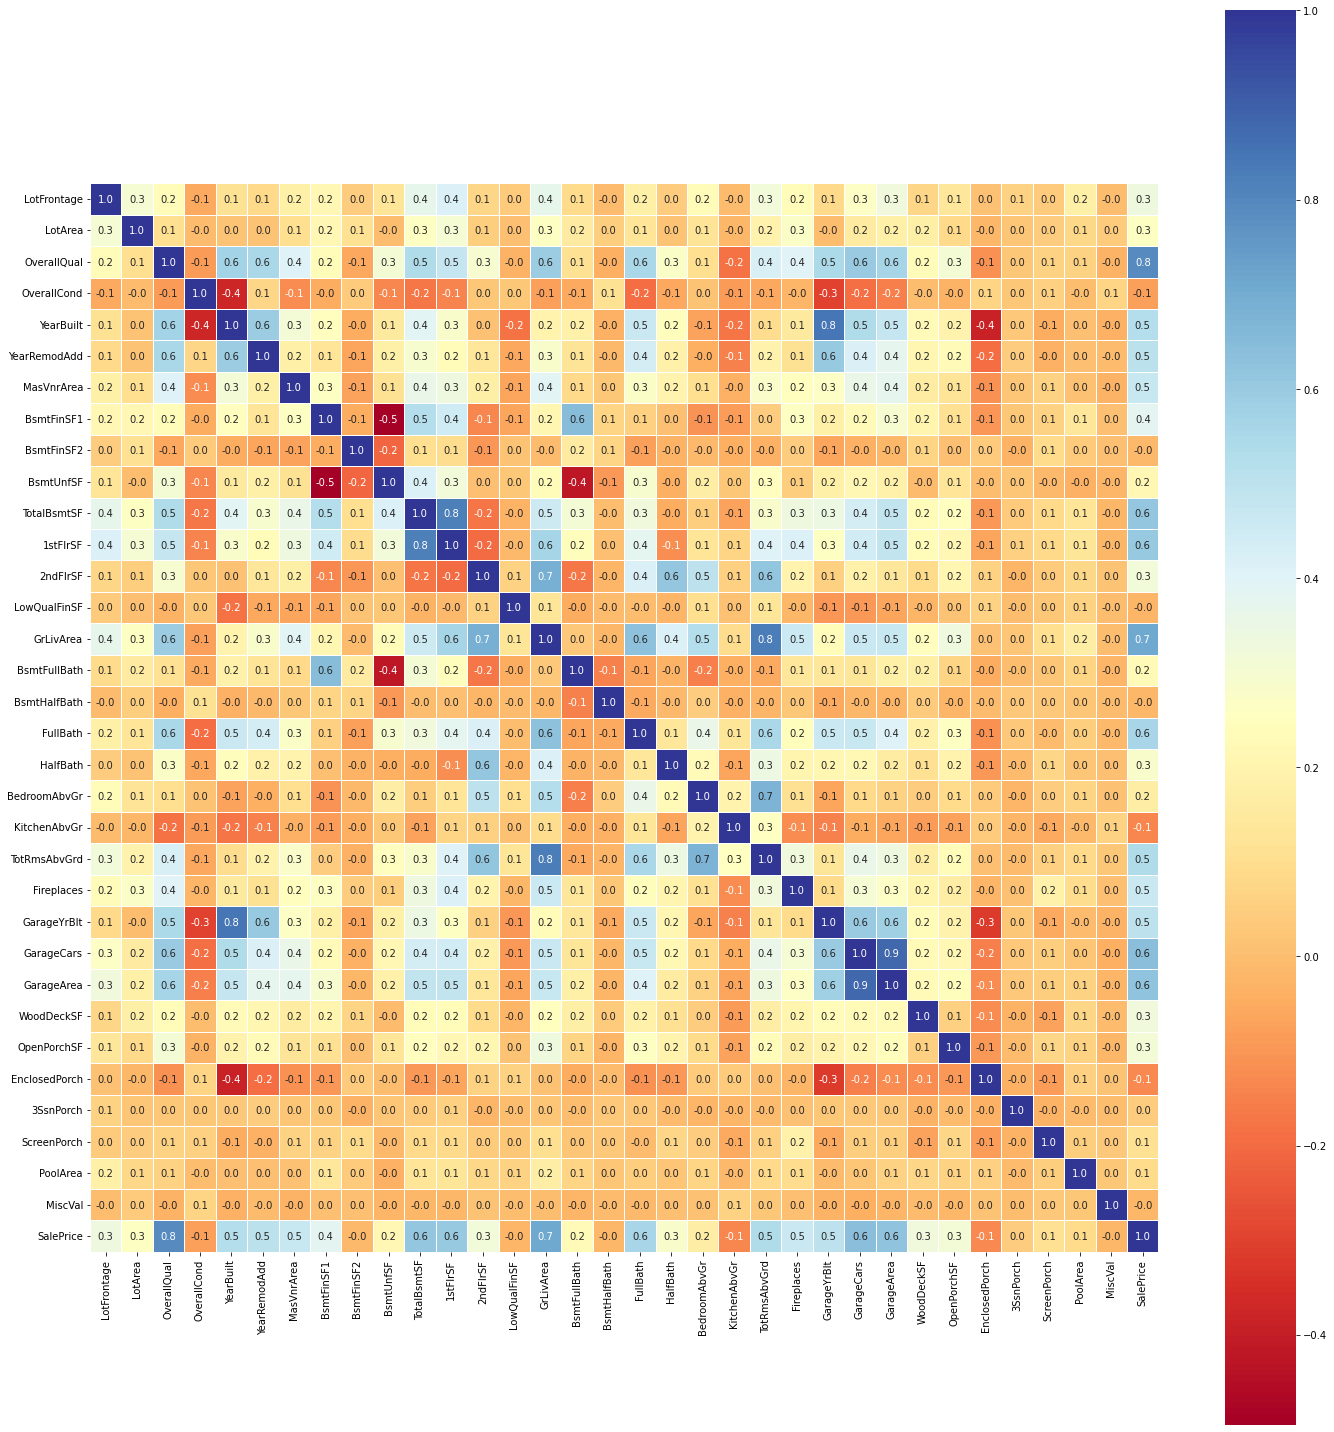

In [14]:
df_corr_housing_training = housing_training_data[numerical_vars]
corrmat_housing_training = df_corr_housing_training.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat_housing_training, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5, fmt=".1f")

In [15]:
#Correlation with output variable
cor_target = abs(corrmat_housing_training["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.503288
Name: SalePrice, dtype: float64

We can use jointplots to take a closer look at the relationship between sale price and five of the continuous variables with which sale price has a strong or moderate association: OverallQual, GrLivArea, GarageArea, Fullbath, and TotalBsmntSF.

Below are plots that examine the relationship between variables of interest and sale price

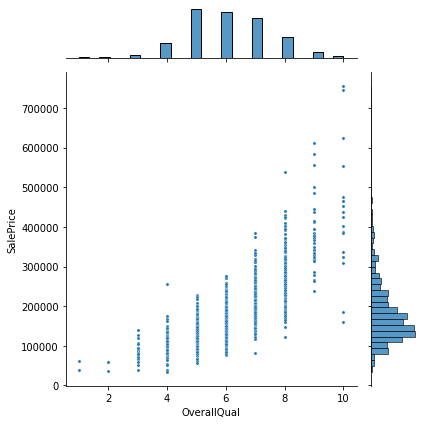

In [16]:
sns.jointplot(x='OverallQual', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

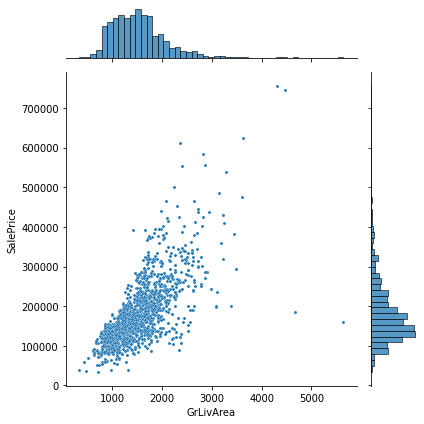

In [17]:
sns.jointplot(x='GrLivArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

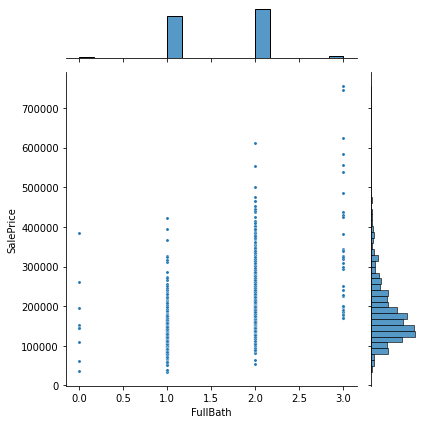

In [18]:
sns.jointplot(x='FullBath', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

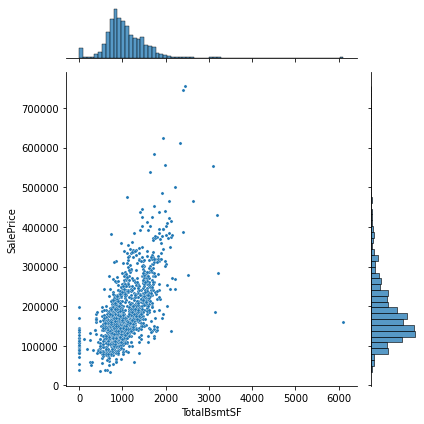

In [19]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

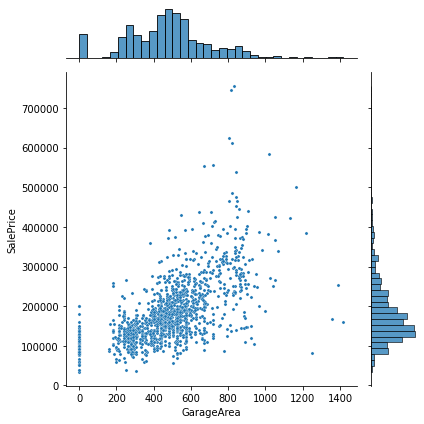

In [20]:
sns.jointplot(x='GarageArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

To determine which binary categorical variables might serve as the best predictors in a regression model, we can create boxplots and run t-tests to help decipher which binary indicator variables may have the strongest relationship with home sale prices.

In [21]:
categorical_variables = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',  'RoofMatl',
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                        'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
                        'GarageQual', 'GarageCond', 'PavedDrive',  'SaleType', 'SaleCondition']

category_counts = []

for var in categorical_variables:
    category_counts.append(len(housing_training_data[var].unique()))
    


categorical_variable_dictionary = {'Categorical Predictor':categorical_variables,'Number of Categories':category_counts}
categorical_var_df = pd.DataFrame(categorical_variable_dictionary)
categorical_var_df


# Identify the Indicator Variables
indicator_variables_df = categorical_var_df[categorical_var_df['Number of Categories'] == 2] 
indicator_variables_df

# Identify the Non-Indicator Categorical Variables
non_indicator_categorial_vars_df = categorical_var_df[categorical_var_df['Number of Categories'] > 2] 
non_indicator_categorial_vars_df



,Categorical Predictor,Number of Categories
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


,Categorical Predictor,Number of Categories
1,Street,2
4,Utilities,2
27,CentralAir,2


,Categorical Predictor,Number of Categories
0,MSZoning,5
2,LotShape,4
3,LandContour,4
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8
10,BldgType,5
11,HouseStyle,8


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

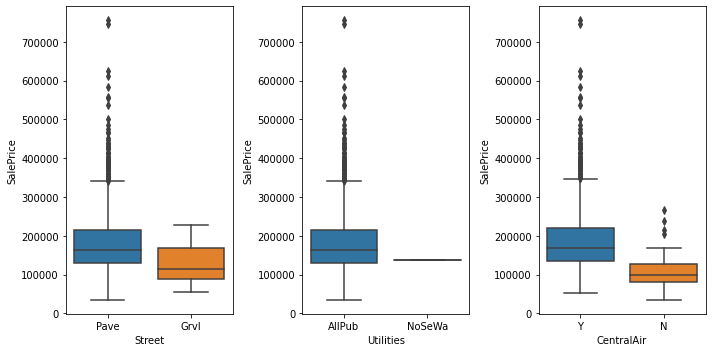

In [22]:
indicator_vars = ['Street', 'Utilities', 'CentralAir']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

for var, subplot in zip(indicator_vars, ax.flatten()):
         sns.boxplot(x = var, y = 'SalePrice', data=housing_training_data, ax=subplot)

fig.tight_layout()

In [23]:
# Run T-Tests To Determine Which Indicator Variables Might Have the Strongest Associations with Sale Price
from scipy.stats import ttest_ind

Street_t_test = ttest_ind(housing_training_data['SalePrice'][housing_training_data['Street'] == 'Pave'],
          housing_training_data['SalePrice'][housing_training_data['Street'] == 'Grvl'],
          equal_var=False)

Utilities_t_test = ttest_ind(housing_training_data['SalePrice'][housing_training_data['Utilities'] == 'AllPub'],
          housing_training_data['SalePrice'][housing_training_data['Utilities'] == 'NoSeWa'],
          equal_var=False)

Central_Air_t_test = ttest_ind(housing_training_data['SalePrice'][housing_training_data['CentralAir'] == 'Y'],
          housing_training_data['SalePrice'][housing_training_data['CentralAir'] == 'N'],
          equal_var=False)



Indicator_Variable_t_test_statistics = [Street_t_test[0], Utilities_t_test[0], Central_Air_t_test[0]]

Indicator_Variable_t_test_p_values = [Street_t_test[1], Utilities_t_test[1], Central_Air_t_test[1]]

indicator_var_t_tests = {'Indicator Variable':indicator_vars,'T-Test Statistic':Indicator_Variable_t_test_statistics, 
                        'P-Values':Indicator_Variable_t_test_p_values}
Indicator_var_t_test_df = pd.DataFrame(indicator_var_t_tests)
Indicator_var_t_test_df.style.background_gradient(cmap = 'Greens')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Indicator Variable,T-Test Statistic,P-Values
0,Street,1.900788,0.115048
1,Utilities,nan,nan
2,CentralAir,17.267773,0.000000


To determine which categorical variables might be most useful for inclusion in a regression model (in the form of a dichotomous variable), we can create boxplots and run analyses of variance (ANOVA) to determine which non-binary categorical variables may have the strongest relationship with home sale prices.

We can create boxplots to visually display the distribution of sale prices disaggregated by the categories associated with each of the non-indicator categorical variables as well.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

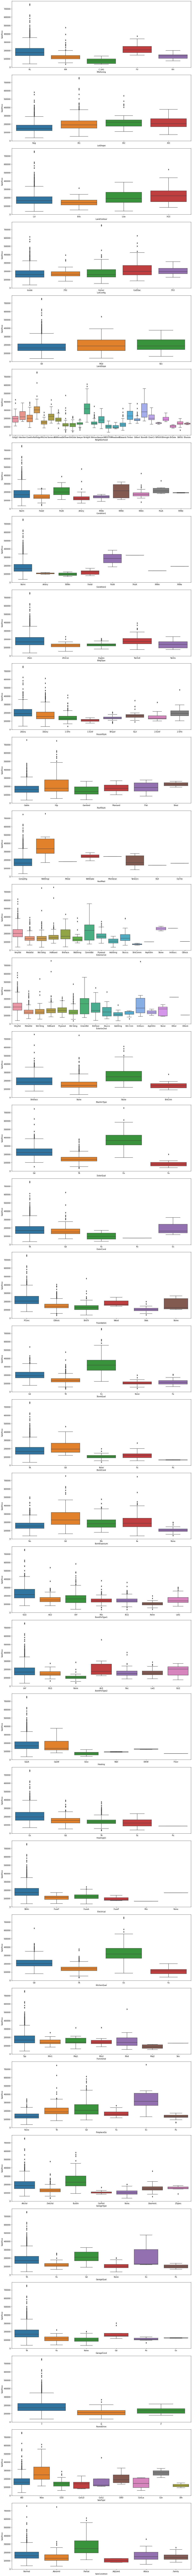

In [24]:

fig, ax = plt.subplots(35, 1, figsize=(15, 200))

for var, subplot in zip(non_indicator_categorial_vars_df['Categorical Predictor'], ax.flatten()):
         sns.boxplot(x = var, y = 'SalePrice', data=housing_training_data, ax=subplot)

fig.tight_layout()

Visual inspection of the boxplots above suggests that the variables for exterior quality, basement quality, fireplace quality, and kitchen quality may provide the most promise in our search for helpful categorical predictors that may be transformed into dichotomous variables.  Conducting ANOVAs can shed more light on the relationship between these four variables and home sale prices.

In [25]:
ANOVA_variables = ['ExterQual', 'BsmtQual', 'FireplaceQu', 'KitchenQual']

from scipy.stats import f_oneway

# ExterQual ANOVA
ExterQual_Gd = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'Gd']
ExterQual_TA = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'TA']
ExterQual_Ex = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'Ex']
ExterQual_Fa = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'Fa']

ANOVA_ExterQual = f_oneway(ExterQual_Gd, ExterQual_TA, ExterQual_Ex, ExterQual_Fa)

# BsmtQual ANOVA
BsmtQual_Gd = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'Gd']
BsmtQual_TA = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'TA']
BsmtQual_Ex = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'Ex']
BsmtQual_None = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'None']
BsmtQual_Fa = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'Fa']

ANOVA_BsmtQual = f_oneway(BsmtQual_Gd, BsmtQual_TA, BsmtQual_Ex, BsmtQual_None, BsmtQual_Fa)
                   
# FireplaceQu ANOVA
FireplaceQu_None = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'None']
FireplaceQu_TA = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'TA']
FireplaceQu_Gd = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Gd']
FireplaceQu_Fa = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Fa']
FireplaceQu_Ex = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Ex']
FireplaceQu_Po = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Po']

ANOVA_FireplaceQu = f_oneway(FireplaceQu_None, FireplaceQu_TA, FireplaceQu_Gd, FireplaceQu_Fa,
                            FireplaceQu_Ex, FireplaceQu_Po)

# KitchenQual ANOVA
KitchenQual_Gd = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'Gd']
KitchenQual_TA = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'TA']
KitchenQual_Ex = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'Ex']
KitchenQual_Fa = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'Fa']

ANOVA_KitchenQual = f_oneway(KitchenQual_Gd, KitchenQual_TA, KitchenQual_Ex, KitchenQual_Fa)

# Compile Outputs

ANOVA_statistics = [ANOVA_ExterQual[0], ANOVA_BsmtQual[0], ANOVA_FireplaceQu[0], ANOVA_KitchenQual[0]]

ANOVA_p_values = [ANOVA_ExterQual[1], ANOVA_BsmtQual[1], ANOVA_FireplaceQu[1], ANOVA_KitchenQual[1]]

ANOVA_outputs = {'Categorical Variable': ANOVA_variables ,'Test Statistic': ANOVA_statistics, 
                 'P-Values': ANOVA_p_values}
ANOVA_df = pd.DataFrame(ANOVA_outputs)
ANOVA_df.style.background_gradient(cmap = 'Greens')





,Categorical Variable,Test Statistic,P-Values
0,ExterQual,443.334831,0.000000
1,BsmtQual,316.148635,0.000000
2,FireplaceQu,121.075121,0.000000
3,KitchenQual,407.806352,0.000000


Based on the analysis above, the variable for exterior quality seems to provide the most promise for the creation of a dichotomous variable for a regression model.  We will use the Tukey-Cramer Multiple Comparison Test to confirm whether there are statistically significant differences in means when considering pairwise comparisons of categorical variable values.

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_cramer_result = pairwise_tukeyhsd(endog=housing_training_data['SalePrice'], 
                                        groups=housing_training_data['ExterQual'],
                                        alpha=0.05)
print(tukey_cramer_result)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -279375.7473  0.001 -323897.1579 -234854.3366   True
    Ex     Gd -135727.4513  0.001 -157297.3415 -114157.5611   True
    Ex     TA -223019.6481  0.001 -244104.9402  -201934.356   True
    Fa     Gd   143648.296  0.001  103567.1096  183729.4823   True
    Fa     TA   56356.0992 0.0016    16533.607   96178.5913   True
    Gd     TA  -87292.1968  0.001  -95594.9096   -78989.484   True
------------------------------------------------------------------


Given that the ANOVA and Tukey-Cramer tests suggested that excellent home exterior quality could be a good predictor of sale price, We can create a dichotomous variable to reflect whether the exterior quality of a home is excellent.

In [27]:
housing_training_data['Excellent_Exterior_Quality'] = np.where(housing_training_data['ExterQual'] == 'Ex', True, False)

housing_training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Excellent_Exterior_Quality
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,False


Encode important categorical variables

In [28]:
from sklearn.preprocessing import LabelEncoder
important_categorical = ['ExterQual', 'BsmtQual', 'FireplaceQu', 'KitchenQual','CentralAir']

# process columns, apply LabelEncoder to categorical features
for i in important_categorical:
    lbl = LabelEncoder() 
    lbl.fit(list(housing_training_data[i].values)) 
    housing_training_data[i] = lbl.transform(list(housing_training_data[i].values))

# shape        
print('Shape all_data: {}'.format(housing_training_data.shape))

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

Shape all_data: (1460, 78)


### Feature Creation

New features may enable us to create more accurate prediction models for home sale prices.  Accordingly, we will create a feature to reflect the number of years since a home has been remodeled.

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: YrSinceRemod, dtype: float64

<AxesSubplot:xlabel='YrSinceRemod'>

Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:


(-0.509078738015629, 4.3748554463775595e-97)

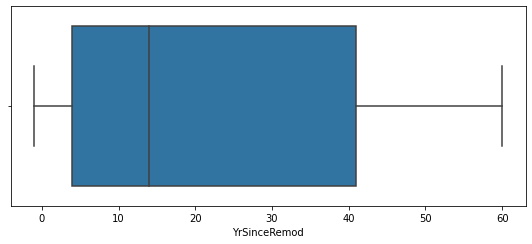

In [29]:
# create new variable, years since the house has been remodeled from selling date (use construction date if no remodeling or additions)
housing_training_data['YrSinceRemod'] = housing_training_data['YrSold'] - housing_training_data['YearRemodAdd']
housing_training_data['YrSinceRemod'].describe()
# create boxplot of YrSinceRemod
sns.boxplot(x = 'YrSinceRemod', data=housing_training_data)

#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res6 = stats.pearsonr(housing_training_data.YrSinceRemod, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:")
res6

We can create a scatterplot to visualize the relationship between years since remodel and sale price.

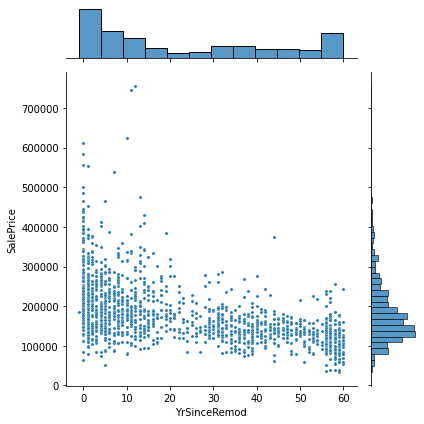

In [30]:
sns.jointplot(x='YrSinceRemod', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

We will also create a feature to reflect the number of total square feet in a home.

count     1460.000000
mean      2572.893151
std        823.598492
min        334.000000
25%       2014.000000
50%       2479.000000
75%       3008.500000
max      11752.000000
Name: TotalSF, dtype: float64

<AxesSubplot:xlabel='TotalSF'>

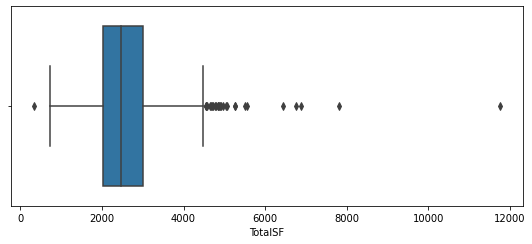

In [31]:
# create new variable TotalSF
housing_training_data['TotalSF'] = housing_training_data['TotalBsmtSF'] + housing_training_data['GrLivArea']
housing_training_data['TotalSF'].describe()
# create boxplot of TotalSF
sns.boxplot(x = 'TotalSF', data=housing_training_data)

<AxesSubplot:xlabel='TotalSF', ylabel='Count'>

Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):


(0.81999629129728, 0.0)

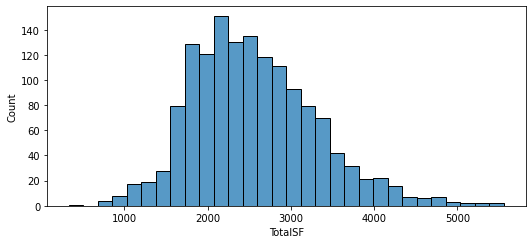

In [32]:
# drop large outlier from the dataframe
housing_training_data.drop(housing_training_data[housing_training_data['TotalSF'] > 6000].index, inplace=True)
# visualize distribution without extreme outliers
sns.histplot(data=housing_training_data, x="TotalSF")

#Pearson correlation coefficient and p value for sale price and TotalSF):
res7 = stats.pearsonr(housing_training_data.TotalSF, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):")
res7

We can create a scatterplot to examine the relationship between total square feet and sale price.

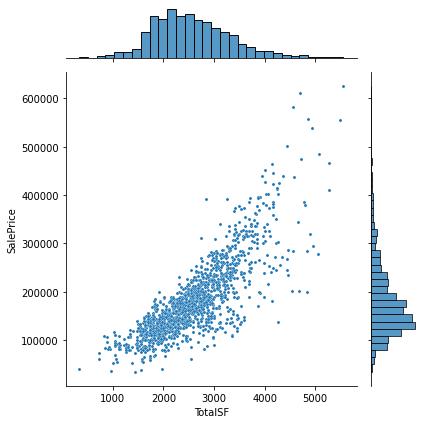

In [33]:
sns.jointplot(x='TotalSF', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

### Model Assumptions

1. Linearity 
2. Homoscedasticity
3. Independence of Errors
4. Multivariate Normality
5. No or little Multicollinearity

### Constructing Models to Predict Home Prices

Below are simple and multiple regressions that examine the associations between variables of interest and sale price.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2982.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:59:50   Log-Likelihood:                -17613.
No. Observations:                1455   AIC:                         3.523e+04
Df Residuals:                    1453   BIC:                         3.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.239e+04   4054.647     -7.989      0.0

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

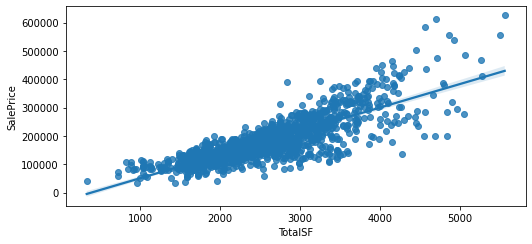

In [34]:
import numpy as np
import statsmodels.api as sm
# New feature is highly correlated, lets try a simple linear regression
x = housing_training_data['TotalSF']
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y)

<AxesSubplot:xlabel='SalePrice'>

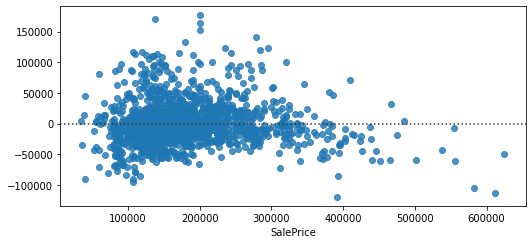

In [35]:
# plot the residuals
y_pred=model.predict(X)
sns.residplot(x=y, y=y_pred)

The residual plot shows evidence of Heteroscedasticity since the residuals are not evenly scattered. For higher Sales Prices, the residuals are negative indicating that the model is over estimating homes with higher Sales Prices. There is evidence that this model violates the linearity assumption, Homoscedasticity assumption and the Independence of Errors assumption.

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([-184865.74057368, -169571.36528068, -156517.81407152, ...,
          195404.36999739,  236556.60682101,  253807.82492125])),
 (42839.88750440423, 1.5086045390486717e-10, 0.9775030165443651))

Text(0.5, 1.0, 'Normal QQ Plot')

Text(0.5, 0, 'Theoretical Quantiles')

Text(0, 0.5, 'Sample Quantiles')

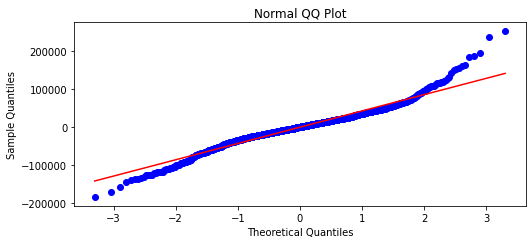

In [36]:
# qqplot
import matplotlib.pyplot as plt
stats.probplot(y-y_pred, dist="norm", plot=plt)
plt.title("Normal QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The tails of the distribution deviate from the qqline indicating that the errors are not Normally distributed.

Let's try transforming the independent variable, Sales Price since we saw earlier in this analysis that this helped to Normalize its distribution.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2934.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:59:51   Log-Likelihood:                 89.766
No. Observations:                1455   AIC:                            -175.5
Df Residuals:                    1453   BIC:                            -165.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9256      0.021    518.068      0.0

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

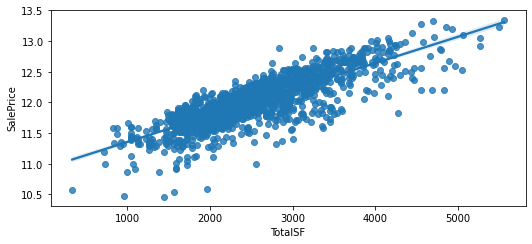

In [37]:
# log transform Sales Price variable
y_log = np.log(housing_training_data['SalePrice'])

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_log, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y_log)

The relationship between log(Sale Price) and TotalSF appears to be linear. This meets the Linearity assumption.

An r-squared value of 0.669 means that the model explains 66.9 percent of the variance in the dependent variable. The omnibus test, however, indicates that residuals are not normally distributed and the high kurtosis value indicates that the distribution of the residuals are more peaked than a normal distribution. The condition number is 1.12e+04, which is quite high and suggests that there may be multicollinearity in the model.

<AxesSubplot:xlabel='SalePrice'>

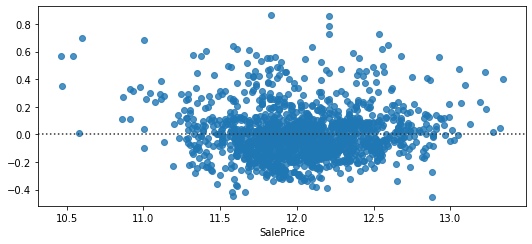

In [38]:
# plot the residuals
y_pred=model.predict(X)
sns.residplot(x=y_log, y=y_pred)

The residuals appear to be more randomly scattered across values of Sales Price. This appears to better meet the Homoscedasticity assumption and the Independence of Errors assumptions than the model with the untransformed Sales Price.

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([-1.17224411, -1.08303201, -1.05546774, ...,  0.54315541,
          0.55983944,  0.73613196])),
 (0.22111127940895553, 6.253817917920981e-15, 0.9700026442288759))

Text(0.5, 1.0, 'Normal QQ Plot')

Text(0.5, 0, 'Theoretical Quantiles')

Text(0, 0.5, 'Sample Quantiles')

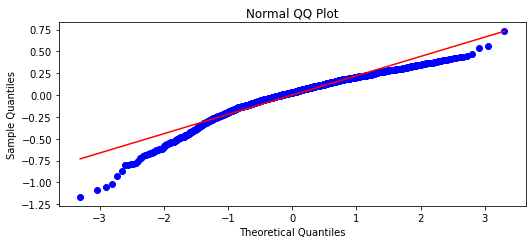

In [39]:
# qqplot
stats.probplot(y_log-y_pred, dist="norm", plot=plt)
plt.title("Normal QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The tails of the distribution still stray from the qqline, indicating the distribution of the errors is not Normal.

We can see the assumptions of a linear model are still not met by transforming Sales Price, lets try building a polynomial model.

#### Polynomial Regression

Third Order Polynomial Regression with Total SF as a predictor of Sales Price

(1455, 4)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:59:52   Log-Likelihood:                -17576.
No. Observations:                1455   AIC:                         3.516e+04
Df Residuals:                    1451   BIC:                         3.518e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.831e+04   2.17e+04      3.146      0.0

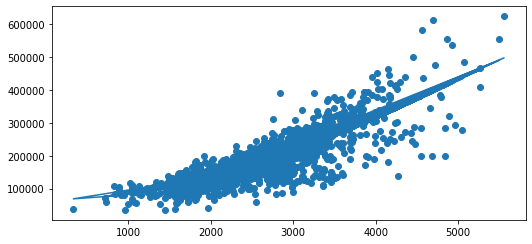

In [40]:
from sklearn.preprocessing import PolynomialFeatures
x = housing_training_data[['TotalSF']]
y = housing_training_data['SalePrice']

polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
xp.shape

model = sm.OLS(y, xp).fit()

#view model summary
print(model.summary())
# predicted sales price
y_pred = model.predict(xp) 

# plot model against data
plt.scatter(x,y)
plt.plot(x,y_pred)

<AxesSubplot:xlabel='SalePrice'>

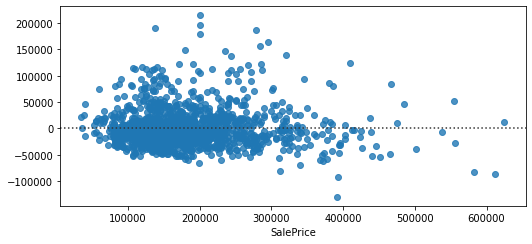

In [41]:
# plot the residuals
sns.residplot(x=y, y=y_pred)

The residuals are fairly scattered across Sales Prices. Let's try adding more predictors to a linear regression model.

#### Multiple Linear Regression

Check the correlation between the two new variables. If they are highly correlated we won't construct a mutliple linear regression model with the both of those variables as predictors.

In [42]:
df_corr_mult_lreg = housing_training_data[['TotalSF','YrSinceRemod']]
df_corr_mult_lreg.corr()

,TotalSF,YrSinceRemod
TotalSF,1.000000,-0.352279
YrSinceRemod,-0.352279,1.000000


TotalSF and YrSinceRemod are not highly correlated so we will construct a multiple linear regression model using the two variables as predictors of the log transformed Sales Price.

In [43]:
x = housing_training_data[['TotalSF','YrSinceRemod']]
y_log = np.log(housing_training_data['SalePrice'])

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_log, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2308.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:59:53   Log-Likelihood:                 326.20
No. Observations:                1455   AIC:                            -646.4
Df Residuals:                    1452   BIC:                            -630.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.2212      0.022    513.127   

An r-squared value of 0.765 means that the model explains 76.5 percent of the variance in the dependent variable. The adjusted R-squared value is about the same as the r-squared value, indicating that we aren't overfitting the model by addding multiple variables. The omnibus test, however, indicates that residuals are not normally distributed and the high kurtosis value indicates that the distribution of the residuals are more peaked than a normal distribution. The condition number is 1.12e+04, which is quite high and suggests that there may be multicollinearity in the model.

<AxesSubplot:xlabel='SalePrice'>

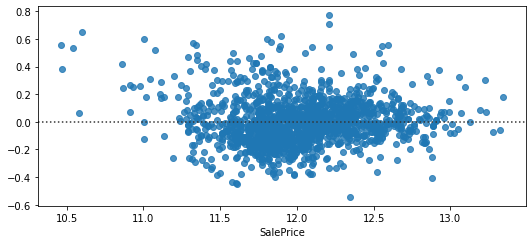

In [44]:
# plot the residuals
y_pred=model.predict(X)
sns.residplot(x=y_log, y=y_pred)

The residuals appear to be more randomly scattered across values of Sales Price. This appears to better meet the Homoscedasticity assumption and the Independence of Errors assumptions than the model with the untransformed Sales Price. But as we mentioned above, the high omnibus value indicates the distribution of the residuals is not normally distributed.

### Piecewise Regression

We can try fitting a linear regression model of sale price using a piecewise regression model.

In [45]:
import pwlf

x = np.array(housing_training_data['TotalSF'])
y = np.array(np.log(housing_training_data['SalePrice']))

# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data for four line segments
res = my_pwlf.fit(3)

# predict for the determined points
xHat = np.array(housing_training_data['TotalSF'])
yHat = my_pwlf.predict(xHat)

piecewise_regression_output = housing_training_data[["TotalSF"]]
piecewise_regression_output['Log Sale Price'] = y.tolist()
piecewise_regression_output['Predicted Log Sale Price'] = yHat.tolist()
piecewise_regression_output['residual'] = piecewise_regression_output['Log Sale Price'] - piecewise_regression_output['Predicted Log Sale Price']
piecewise_regression_output['squared residuals'] = piecewise_regression_output['residual'] ** 2

RMSE = (piecewise_regression_output['squared residuals'].sum() / len(piecewise_regression_output['squared residuals']) ) ** 0.5
print(f"The Root Mean Squared Error of this piecewise regression model is {RMSE}.")

correlation = piecewise_regression_output['Log Sale Price'].corr(piecewise_regression_output['Predicted Log Sale Price'])
print(f"The correlation of this piecewise regreession model is {correlation}.")


The Root Mean Squared Error of this piecewise regression model is 0.2253870306616782.
The correlation of this piecewise regreession model is 0.8215249613160736.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

We can visualize the residuals plot to examine whether the regression model may violate any of the regression assumptions.

<AxesSubplot:>

Text(0, 0.5, 'Standardized Residual')

Text(0.5, 0, 'TotalSF')

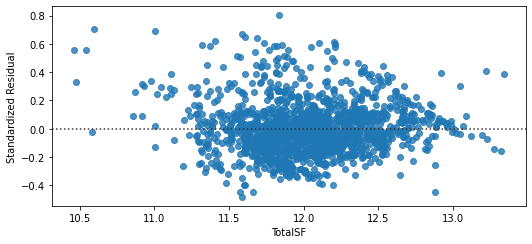

In [46]:
sns.residplot(x=y, y=yHat)
plt.ylabel('Standardized Residual')
plt.xlabel('TotalSF')

We can visualize a Q-Q plot to determine whether this regression model violates the linear regression assumption that residuals are noramlly distributed.

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([-1.16507054, -1.06389866, -1.03924475, ...,  0.54759817,
          0.57974149,  0.72347869])),
 (0.21935094918618248, 7.904013153481133e-15, 0.9712739756549295))

Text(0.5, 1.0, 'Normal QQ Plot')

Text(0.5, 0, 'Theoretical Quantiles')

Text(0, 0.5, 'Sample Quantiles')

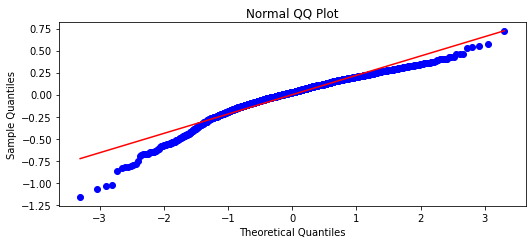

In [47]:
# qqplot
stats.probplot(y - yHat, dist="norm", plot=plt)
plt.title("Normal QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

We will try and add more predictors to our model. First, lets observe any multicollinearity.

## Inspection of multicollinearity: VIF, correlations

The correlation between garage cars and total square feet is moderately high. We will take that into consideration when analyzing the output of the model.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
x = housing_training_data[['TotalSF','YrSinceRemod','GarageCars','ExterQual','CentralAir']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)
x.corr()

        feature        VIF
0       TotalSF  14.662165
1  YrSinceRemod   3.243161
2    GarageCars  10.247820
3     ExterQual  12.812931
4    CentralAir  14.699583


,TotalSF,YrSinceRemod,GarageCars,ExterQual,CentralAir
TotalSF,1.000000,-0.352279,0.556693,-0.483450,0.180174
YrSinceRemod,-0.352279,1.000000,-0.422033,0.480107,-0.299245
GarageCars,0.556693,-0.422033,1.000000,-0.447523,0.233414
ExterQual,-0.483450,0.480107,-0.447523,1.000000,-0.085933
CentralAir,0.180174,-0.299245,0.233414,-0.085933,1.000000


These VIF values suggests that our model contains some multicollinearity across all features. Some resources stated that greater than 10 suggests multicollinearity, while others used a cut-off of 5.0 or 1.0. This may not be an issue for a predictive model, but could have implications for an inferential model.

In [49]:
x = housing_training_data[['TotalSF','YrSinceRemod','GarageCars','Excellent_Exterior_Quality','CentralAir']]
y_log = np.log(housing_training_data['SalePrice'])


polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)
xp.shape

#add constant to predictor variables
x = sm.add_constant(xp)

#fit polynomial regression model
model = sm.OLS(y_log, x).fit()

#view model summary
print(model.summary())

(1455, 21)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     412.1
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:59:54   Log-Likelihood:                 574.02
No. Observations:                1455   AIC:                            -1112.
Df Residuals:                    1437   BIC:                            -1017.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6513      0.090    118.095      0.0

<AxesSubplot:xlabel='SalePrice'>

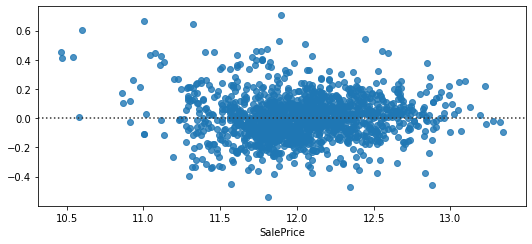

In [50]:
# plot the residuals
y_pred=model.predict(x)
sns.residplot(x=y_log, y=y_pred)

The adjusted r-squared value is high for the 2nd order polynomial model, but the residuals are not randomly scattered. The plot indicates that the model is underestimating the value of homes with actual low sales prices and overestimating the value of homes with actual high sales prices.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

Let's use PCA to find some more important predictors to add to our models

## Regress on principal components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Id,-0.005909,0.014958,-0.011284,-0.002488,-0.017369,-0.046538,0.023226,0.032373
MSSubClass,-0.012204,0.080370,-0.278781,-0.188115,0.352751,-0.064781,0.127411,0.247888
LotFrontage,0.110586,0.087468,0.234430,0.071633,-0.176092,-0.024338,-0.022364,-0.231121
LotArea,0.068160,0.064595,0.246330,-0.094678,-0.100251,0.002935,0.066998,-0.009771
OverallQual,0.270606,-0.015069,-0.061261,0.021368,0.002469,0.114572,-0.060625,0.028644
OverallCond,-0.066550,0.038027,0.025912,-0.089610,-0.225601,0.484802,0.247949,-0.015509
YearBuilt,0.220423,-0.226182,-0.176541,-0.059718,-0.084121,-0.227579,-0.054445,-0.001819
YearRemodAdd,0.208273,-0.151206,-0.229276,-0.019507,-0.147906,0.168903,0.337900,0.001503
MasVnrArea,0.159272,0.016322,0.044181,-0.040351,0.125622,-0.028650,-0.270203,-0.023282
ExterQual,-0.228220,0.087863,0.081144,-0.147353,-0.243604,-0.215199,0.089686,0.051520


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<AxesSubplot:>

Text(0.5, 0, 'Log Sale Price (Standard Scaled)')

Text(0, 0.5, 'Predicted Log Sale Price')

Text(0.5, 1.0, 'Log Sale Price vs Predicted Log Sale Price')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Log Sale Price')

Text(0, 0.5, 'Residual')

Text(0.5, 1.0, 'Residual Plot')

MSE: 0.12963226774939893
R_sq: 0.870367732250601


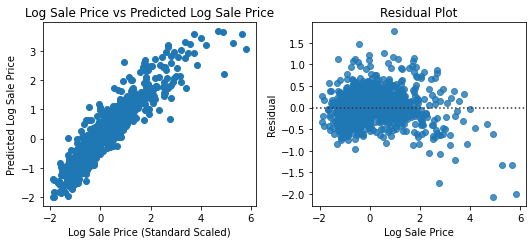

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

scaler = StandardScaler()
 
pca = PCA(n_components=8)


## independent variables ###

x_raw = housing_training_data.select_dtypes(exclude=['object']).drop(columns = ['SalePrice'])
x_scale = scaler.fit_transform(x_raw)

x_pca_raw = pca.fit_transform(x_raw)
x_pca_scale = pca.fit_transform(x_scale) # PCA is affected by scale. We use the scaled values.


## importance scores of the principal components ##
# show loadings for features
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'], index=x_raw.columns)
loadings


## dependent variable ##

y_trans = scaler.fit_transform(housing_training_data[['SalePrice']])

y_raw = np.array(housing_training_data[['SalePrice']]).reshape(-1,1)
y_scale = np.array(y_trans).reshape(-1,1)

## train linear model ##

regr = LinearRegression()

regr.fit(x_pca_scale, y_scale)

y_pred = regr.predict(x_pca_scale)


plt.subplot(1, 2, 1)

plt.scatter(y_scale, y_pred)
plt.xlabel('Log Sale Price (Standard Scaled)')
plt.ylabel('Predicted Log Sale Price')
plt.title('Log Sale Price vs Predicted Log Sale Price')

# Residuals
plt.subplot(1, 2, 2)
sns.residplot(x=y_scale, y=y_pred)
plt.xlabel('Log Sale Price')
plt.ylabel('Residual')
plt.title('Residual Plot')
## calculate RMSE ## 

# Mean Squared Error
MSE = np.square(np.subtract(y_scale,y_pred)).mean()
print("MSE:",MSE)

r2 = r2_score(y_scale, y_pred)
print("R_sq:",r2)

In [79]:
x_raw.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Excellent_Exterior_Quality',
       'YrSinceRemod', 'TotalSF'],
      dtype='object')

In [80]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores_mse = cross_val_score(model, x_pca_scale, y_scale, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("Over 10 folds: %0.2f MSE with a standard deviation of %0.2f" % (scores_mse.mean(), scores_mse.std()))


#use k-fold CV to evaluate model R2
scores_r2 = cross_val_score(model, x_pca_scale, y_scale, scoring='r2',
                         cv=cv, n_jobs=-1)
print("Over 10 folds: %0.2f r2 with a standard deviation of %0.2f" % (scores_r2.mean(), scores_r2.std()))

Over 10 folds: -0.25 MSE with a standard deviation of 0.03
Over 10 folds: 0.87 r2 with a standard deviation of 0.02


There appears to be a lot of large negative residuals for higher Sales Prices indicating that the model is overestimating the price of homes with large sales prices.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<AxesSubplot:>

Text(0.5, 0, 'Log Sale Price (Standard Scaled)')

Text(0, 0.5, 'Predicted Log Sale Price')

Text(0.5, 1.0, 'Log Sale Price vs Predicted Log Sale Price')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Log Sale Price')

Text(0, 0.5, 'Residual')

Text(0.5, 1.0, 'Residual Plot')

MSE: 0.15526016516119903
R_sq: 0.8789054567599288


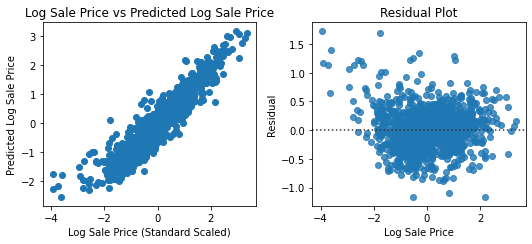

In [81]:
# Try log of Y

y_log_scale = scaler.fit_transform(np.array(np.log(housing_training_data['SalePrice'])).reshape(-1,1))

## train linear model ##

regr2 = LinearRegression()

regr2.fit(x_pca_scale, y_log_scale)

y_pred = regr2.predict(x_pca_scale)

plt.subplot(1, 2, 1)

plt.scatter(y_log_scale, y_pred)
plt.xlabel('Log Sale Price (Standard Scaled)')
plt.ylabel('Predicted Log Sale Price')
plt.title('Log Sale Price vs Predicted Log Sale Price')

# Residuals
plt.subplot(1, 2, 2)
sns.residplot(x=y_log_scale, y=y_pred)
plt.xlabel('Log Sale Price')
plt.ylabel('Residual')
plt.title('Residual Plot')

##RMSE
# Mean Squared Error

MSE = np.square(np.subtract(y_scale,y_pred)).mean()
print("MSE:",MSE)

r2 = r2_score(y_log_scale, y_pred)
print("R_sq:",r2)

In [82]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores_mse = cross_val_score(model, x_pca_scale, y_log_scale, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("Over 10 folds: %0.2f MSE with a standard deviation of %0.2f" % (scores_mse.mean(), scores_mse.std()))


#use k-fold CV to evaluate model R2
scores_r2 = cross_val_score(model, x_pca_scale, y_log_scale, scoring='r2',
                         cv=cv, n_jobs=-1)
print("Over 10 folds: %0.2f r2 with a standard deviation of %0.2f" % (scores_r2.mean(), scores_r2.std()))

Over 10 folds: -0.25 MSE with a standard deviation of 0.02
Over 10 folds: 0.88 r2 with a standard deviation of 0.02


There are a lot of positive residuals for lower sales prices indicating that the model is underestimating the value of homes with lower sales prices.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<AxesSubplot:>

Text(0.5, 0, 'Sale Price (Standard Scaled)')

Text(0, 0.5, 'Predicted Sale Price')

Text(0.5, 1.0, 'Sale Price vs Predicted Sale Price')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Sale Price')

Text(0, 0.5, 'Residual')

Text(0.5, 1.0, 'Residual Plot')

x_shape_transformed (1455, 45)
x_shape_original (1455, 8)
MSE: 0.08760165238841165
R_sq: 0.9123983476115883
R_sq_adjusted: 0.9096005659526256


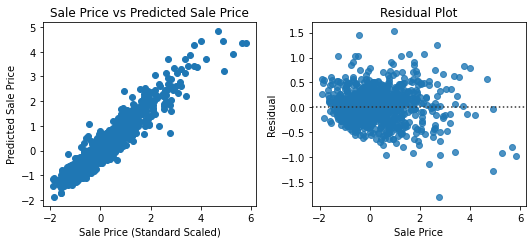

In [83]:
### FROM PCA ON SALE PRICE WE SEE QUADRATIC PATTERN -- TRY DEGREE 2 POLYNOMIAL

from sklearn.preprocessing import PolynomialFeatures

#define our polynomial model, degree 2

degree=2

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_pca_scale)

regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_scale)
y_pred = regression_model.predict(poly_x_values)

plt.subplot(1, 2, 1)
plt.scatter(y_scale, y_pred)
plt.xlabel('Sale Price (Standard Scaled)')
plt.ylabel('Predicted Sale Price')
plt.title('Sale Price vs Predicted Sale Price')

# Residuals

plt.subplot(1, 2, 2)
sns.residplot(x=y_scale, y=y_pred)
plt.xlabel('Sale Price')
plt.ylabel('Residual')
plt.title('Residual Plot')


# SCORES

SS_Residual = sum((y_scale-y_pred)**2)       
SS_Total = sum((y_scale-np.mean(y_scale))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_scale)-1)/(len(y)-poly_x_values.shape[1]-1)

print('x_shape_transformed',poly_x_values.shape)
print('x_shape_original',x_pca_scale.shape)

MSE = np.square(np.subtract(y_scale,y_pred)).mean()
print("MSE:",MSE)

r2 = r2_score(y_scale, y_pred)
print("R_sq:",r_squared[0])

print("R_sq_adjusted:", 1 - (1-r_squared[0])*(len(y_scale)-1)/(len(y_scale)-poly_x_values.shape[1]-1))

In [58]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores_mse = cross_val_score(model, poly_x_values, y_scale, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("Over 10 folds: %0.2f MSE with a standard deviation of %0.2f" % (scores_mse.mean(), scores_mse.std()))


#use k-fold CV to evaluate model R2
scores_r2 = cross_val_score(model, poly_x_values, y_scale, scoring='r2',
                         cv=cv, n_jobs=-1)
print("Over 10 folds: %0.2f r2 with a standard deviation of %0.2f" % (scores_r2.mean(), scores_r2.std()))

Over 10 folds: -0.21 MSE with a standard deviation of 0.03
Over 10 folds: 0.90 r2 with a standard deviation of 0.01


We will need to verify that better fit is not just from including more variables. We do this using cross validation to assess out of sample accuracy. 

The residuals are a bit more scattered, but there are still some more large negative residuals for higher sales prices.

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

[ 0.          0.          0.17296878 -0.          0.          0.
  0.          0.          0.          0.          0.00587394  0.
  0.         -0.          0.06700516  0.         -0.          0.
  0.          0.         -0.          0.          0.          0.
  0.02809537  0.00115474  0.          0.         -0.          0.
  0.          0.         -0.        ]
[-2.46470368e-15]


<AxesSubplot:>

Text(0.5, 0, 'Sale Price (Standard Scaled)')

Text(0, 0.5, 'Predicted Sale Price')

Text(0.5, 1.0, 'ElasticNet: Sale Price vs Predicted Sale Price')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Sale Price')

Text(0, 0.5, 'Residual')

Text(0.5, 1.0, 'Residual Plot')

MSE: 1.058250120091334
R_sq: 0.36078782270420806


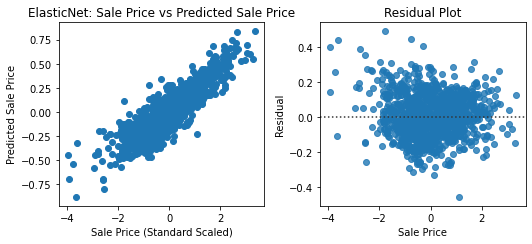

In [59]:
# Lastly, try a regularization technique

from sklearn.linear_model import ElasticNet

scaler = StandardScaler()

# As an experiment, use on an original set of x variables...

x_raw = housing_training_data[numerical_vars].drop(columns = 'SalePrice')
x_scale = scale(x_raw)

#x_raw_new = housing_training_data.select_dtypes(exclude=['object']).drop(columns = ['SalePrice'])
#x_scale = scaler.fit_transform(x_raw_new)

regr = ElasticNet()
regr.fit(x_scale, y_log_scale)

ElasticNet(random_state=0)
print(regr.coef_)
print(regr.intercept_)

y_pred = regr.predict(x_scale)

plt.subplot(1, 2, 1)
plt.scatter(y_log_scale, y_pred)
plt.xlabel('Sale Price (Standard Scaled)')
plt.ylabel('Predicted Sale Price')
plt.title('ElasticNet: Sale Price vs Predicted Sale Price')

# Residuals

plt.subplot(1, 2, 2)
sns.residplot(x=y_log_scale, y=y_pred)
plt.xlabel('Sale Price')
plt.ylabel('Residual')
plt.title('Residual Plot')


MSE = np.square(np.subtract(y_scale,y_pred)).mean()
print("MSE:",MSE)

r2 = r2_score(y_scale, y_pred)
print("R_sq:",r2)

In [60]:
x = housing_training_data[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars','GarageArea']]
y_log = np.log(housing_training_data['SalePrice'])

#polynomial_features= PolynomialFeatures(degree=2)
#xp = polynomial_features.fit_transform(x)
#xp.shape

#add constant to predictor variables
#x = sm.add_constant(xp)
x = sm.add_constant(x)

#fit polynomial regression model
model = sm.OLS(y_log, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1370.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:59:59   Log-Likelihood:                 555.36
No. Observations:                1455   AIC:                            -1099.
Df Residuals:                    1449   BIC:                            -1067.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5342      0.020    524.743      

### Polynomial regression using predictors from PCA for Kaggle

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<AxesSubplot:>

Text(0.5, 0, 'Sale Price (Standard Scaled)')

Text(0, 0.5, 'Predicted Sale Price')

Text(0.5, 1.0, 'Sale Price vs Predicted Sale Price')

<AxesSubplot:>

Text(0.5, 1.0, 'Residuals')

<AxesSubplot:title={'center':'Residuals'}>

MSE: 0.08710552160586477
R_sq: 0.9128944783941353


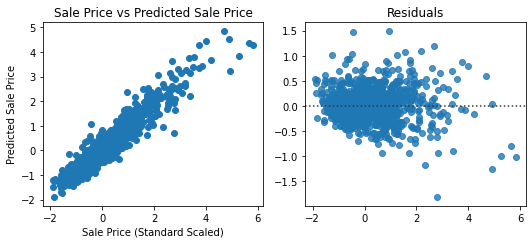

In [61]:
from sklearn.preprocessing import PolynomialFeatures
ypolyscaler = StandardScaler()
poly_y_scale = ypolyscaler.fit_transform(np.array(housing_training_data['SalePrice']).reshape(-1,1))
#define our polynomial model, with whatever degree we want
degree=2

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_pca_scale)

poly_regression_model = LinearRegression()
poly_regression_model.fit(poly_x_values, poly_y_scale)
y_pred = poly_regression_model.predict(poly_x_values)

plt.subplot(1,2,1)

plt.scatter(poly_y_scale, y_pred)
plt.xlabel('Sale Price (Standard Scaled)')
plt.ylabel('Predicted Sale Price')
plt.title('Sale Price vs Predicted Sale Price')

# Residuals
plt.subplot(1,2,2)
plt.title('Residuals')
sns.residplot(x=poly_y_scale, y=y_pred)

# Mean Squared Error

MSE = np.square(np.subtract(poly_y_scale,y_pred)).mean()
print("MSE:",MSE)

r2 = r2_score(y_scale, y_pred)
print("R_sq:",r2)

### Ridge regression using predictors from PCA with Cross Validation to find the best alpha

Principal components have no collinearity by definition. However, we were interested in applying a Ridge regularization model to our PCA and seeing how it would perform, including what value of alpha it would select. There are many methods aimed at making our PCA more robust/reduce overfitting inherent in their calculation. See below for comments about the loading within our components. 

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

Best alpha value: 16.768329368110066
Coefficients: [[ 0.29564598  0.01399251  0.05131192 -0.09043666 -0.04930898  0.07802145
   0.00204428  0.00818516]]


Text(0.5, 0, 'Sale Price (Standard Scaled)')

Text(0, 0.5, 'Predicted Sale Price')

Text(0.5, 1.0, 'Sale Price vs Predicted Sale Price')

MSE: 0.1357921550273285
R_sq: 0.8806208257731393


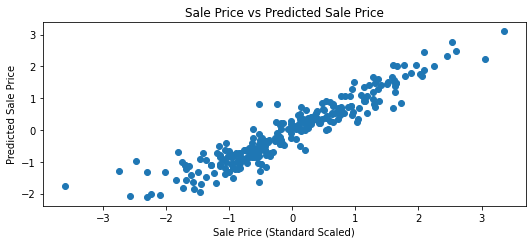

In [62]:
from sklearn.model_selection import GridSearchCV
yscaler = StandardScaler()
y_log_scale = yscaler.fit_transform(np.array(np.log(housing_training_data['SalePrice'])).reshape(-1,1))

pca = PCA(n_components=8)

## independent variables ###
xscaler = StandardScaler()
x_raw = housing_training_data.select_dtypes(exclude=['object']).drop(columns = ['SalePrice'])
x_scale = xscaler.fit_transform(x_raw)

x_pca_raw = pca.fit_transform(x_raw)

x_pca_scale = pca.fit_transform(x_scale) # PCA is affected by scale. We use the scaled values.


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca_scale, y_log_scale, test_size=0.2, random_state=42)

# Set the alpha values to test
alpha_values = np.logspace(-4, 4, num=50)

# Create the Ridge Regression model
ridge = Ridge()

# Set up the grid search with cross-validation
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha value:", best_alpha)

# Create and fit the Ridge Regression model with the best alpha value
ridge_best = Ridge(alpha=best_alpha)

ridgemodel = ridge_best.fit(X_train, y_train)
# View the coefficients of the ridge model
coefficients = ridgemodel.coef_
print("Coefficients:", coefficients)

# Predict
y_pred = ridgemodel.predict(X_test)

# plot predictors against log scaled
plt.scatter(y_test, y_pred)
plt.xlabel('Sale Price (Standard Scaled)')
plt.ylabel('Predicted Sale Price')
plt.title('Sale Price vs Predicted Sale Price')
# Calculate the mean squared error (MSE) of the predictions
MSE = np.square(np.subtract(y_test,y_pred)).mean()
print("MSE:",MSE)

# Calculate the R^2 of the predictions
r2 = r2_score(y_test, y_pred)
print("R_sq:",r2)

In [63]:
x_raw.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Excellent_Exterior_Quality',
       'YrSinceRemod', 'TotalSF'],
      dtype='object')

### Interpret the coefficients
Coef0: (0.29916159) has a positive impact on Sale Price. Given thatAs this feature increases, the predicted house price also increases. This coefficient has the largest positive effect among all features. In the PCA loadings for PC1, TotalSF and OverQual accounting for over 0.50 of the component, indicating both these features have a larger postive impact on Sale Price.

Coef1: (0.01065569) has a small positive impact on Sale Price. As this feature increases, the predicted house price marginally increases.

Coef2: (0.05379505) has a positive impact on Sale Price. As this feature increases, the predicted house price increases.

Coef3: (0.08326186) has a positive impact on Sale Price. As this feature increases, the predicted house price increases.

Coef4: (-0.09188438) has a negative impact on Sale Price. As this feature increases, the predicted house price decreases. This coefficient has the largest negative effect among all features.

Coef5: (0.03202796) has a positive impact on Sale Price. As this feature increases, the predicted house price increases.

Coef6: (0.01423303) has a small positive impact on Sale Price. As this feature increases, the predicted house price marginally increases.

Coef7: (-0.01638527) has a small negative impact on Sale Price. As this feature increases, the predicted house price marginally decreases.

<AxesSubplot:>

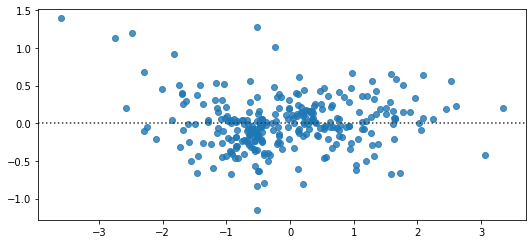

In [64]:
# Residuals

sns.residplot(x=y_test, y=y_pred)

## Prepare Test Data

In [65]:
# load test data
housing_testing_data = pd.read_csv('test.csv')

In [66]:
# process columns, apply LabelEncoder to categorical features
for i in important_categorical:
    lbl = LabelEncoder() 
    lbl.fit(list(housing_testing_data[i].values)) 
    housing_testing_data[i] = lbl.transform(list(housing_testing_data[i].values))

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

Handle Null values, matches how we dealt with Nulls in the training dataset

In [67]:
# find null counts, percentage of null values, and column type
null_count = housing_testing_data.isnull().sum()
null_percentage = housing_testing_data.isnull().sum() * 100 / len(housing_testing_data)
column_type = housing_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
PoolQC,1456,99.794380,object
MiscFeature,1408,96.504455,object
Alley,1352,92.666210,object
Fence,1169,80.123372,object
LotFrontage,227,15.558602,float64
GarageCond,78,5.346127,object
GarageYrBlt,78,5.346127,float64
GarageQual,78,5.346127,object
GarageFinish,78,5.346127,object
GarageType,76,5.209047,object


In [68]:
# PoolQC, MiscFeature, Alley, Fence all have over 50% of missing values, we will remove those from our dataframe
housing_testing_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

columns_None = ['SaleType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','MSZoning','FireplaceQu','Functional','Utilities','GarageCond','MasVnrType','Exterior2nd','Exterior1st']
# set Nulls in non-numeric columns to 'None'
housing_testing_data[columns_None] = housing_testing_data[columns_None].fillna('None')

In [69]:
# change Null values to 0 for the following variables
columns_zero = ['MasVnrArea','GarageArea','GarageCars','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','BsmtHalfBath','BsmtFullBath']
housing_testing_data[columns_zero] = housing_testing_data[columns_zero].fillna(0)


# fill Nulls for Lot Frontage with median value
housing_testing_data['LotFrontage'].fillna(housing_testing_data['LotFrontage'].median(), inplace=True)


# fill Nulls with year garage was built with median value
housing_testing_data['GarageYrBlt'].fillna(housing_testing_data['GarageYrBlt'].median(), inplace=True)

In [70]:
# create new variable TotalSF
housing_testing_data['TotalSF'] = housing_testing_data['TotalBsmtSF'] + housing_testing_data['GrLivArea']

# create new variable, years since the house has been remodeled from selling date (use construction date if no remodeling or additions)
housing_testing_data['YrSinceRemod'] = housing_testing_data['YrSold'] - housing_testing_data['YearRemodAdd']

# create excellent exterior quality variable
housing_testing_data['Excellent_Exterior_Quality'] = np.where(housing_testing_data['ExterQual'] == 'Ex', True, False)

Scale x-values and transform using PCA, then use those values in the ridge model we created above to predict values of Sales Price

In [71]:
# select numeric variables in the test data for x
x_test_raw = housing_testing_data.select_dtypes(exclude=['object'])
# scale x-values
x_test_scale = xscaler.fit_transform(x_test_raw)
# transform x-values using PCA
x_test_pca_scale = pca.transform(x_test_scale)
# use x-values to predict y values
scaled_y_predtest = ridgemodel.predict(x_test_pca_scale)

# Apply inverse scaling transformation to predicted y-values
y_predtest = yscaler.inverse_transform(scaled_y_predtest)
# Exponential transform the predictions (since the model output log transformed y-values)
y_pred_final = np.exp(y_predtest)

Create dataframe with Id and Sales Price predictions

In [72]:
# Create a dataframe with the y predictions 
predictiondf=pd.DataFrame(y_pred_final, columns=['SalePrice'])
# Add the Id column to the front of the dataframe
predictiondf.insert(0, 'Id', housing_testing_data['Id'])

predictiondf.head()

,Id,SalePrice
0,1461,124923.795956
1,1462,161182.690072
2,1463,184946.275551
3,1464,196901.378439
4,1465,162679.619736


In [73]:
#output predictions to csv
predictiondf.to_csv('test_salespriceridge_v6_ridge.csv', index=False)

### Kaggle Results - Ridge Regression

Upon submission of our home price predictions from the ridge regression model into Kaggle using Claire Markey's username, the team achieved a RMSE (as calculated using the log of the predicted and actual home prices) of 0.16954 for the testing dataset as displayed in the screenshot from the Kaggle leaderboard below.

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1246.5, 126.5, -0.5)

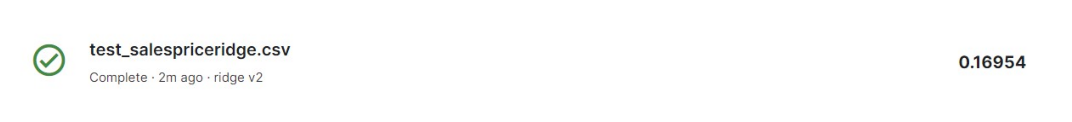

In [74]:
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_RMSE_ridge.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Predicting Home Sale Prices In the Testing Dataset using the Polynomial Model

Let's predict Sales Price using our polynomial model

In [75]:
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_test_values = poly_model.fit_transform(x_test_pca_scale)

y_poly_pred = poly_regression_model.predict(poly_x_test_values)

# Apply inverse scaling transformation to predicted y-values
y_poly_predtest = ypolyscaler.inverse_transform(y_poly_pred)

In [76]:
# Create a dataframe with the y predictions 
predictionpolydf=pd.DataFrame(y_poly_predtest, columns=['SalePrice'])
# Add the Id column to the front of the dataframe
predictionpolydf.insert(0, 'Id', housing_testing_data['Id'])
predictionpolydf.head()

,Id,SalePrice
0,1461,132548.140244
1,1462,163901.344392
2,1463,185518.483857
3,1464,195882.852061
4,1465,153642.714468


In [77]:
#output predictions to csv

predictionpolydf.to_csv('test_salespricepoly_v5.csv', index=False)

### Kaggle Results - Polynomial Regression

Upon submission of our home price predictions from the polynomial model into Kaggle using Claire Markey's username, the team achieved a RMSE (as calculated using the log of the predicted and actual home prices) of 0.163 for the testing dataset as displayed in the screenshot from the Kaggle leaderboard below.

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1300.5, 420.5, -0.5)

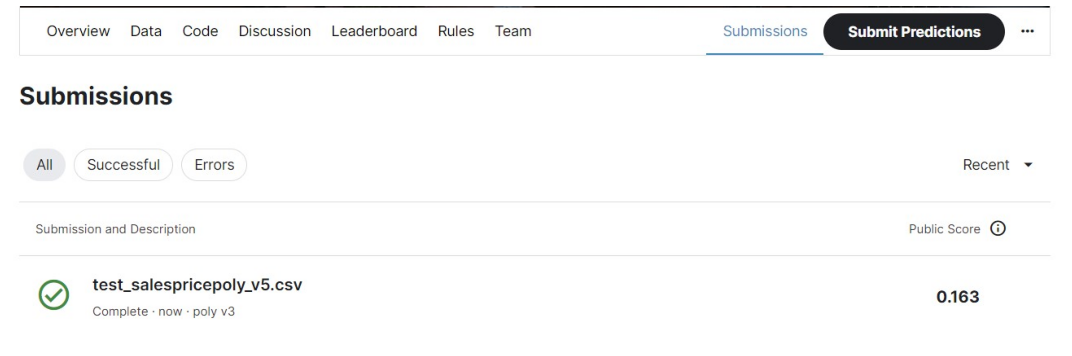

In [78]:
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_RMSE_poly.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()